 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami for earthquakes measure dwith the mb magnitude type.

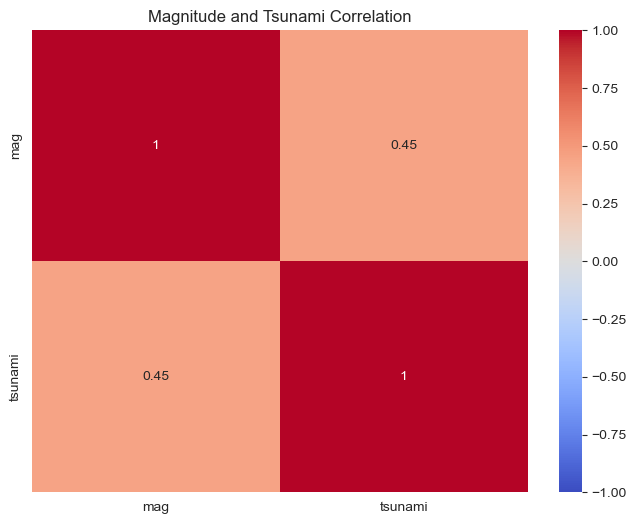

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Creates DataFrame from csv. Pulls from dataset to create new DataFrame featuring 'mb' magType, mag, and tsunami columns. Creates correlation matrix.
df = pd.read_csv('earthquakes.csv')
df_mb = df[(df['magType'] == "mb")]
df_mb = df_mb[['mag', 'tsunami']]
corr_matrix = df_mb.corr() 
# Creates heatmap using the correlation matrix. Defines colormap and vmin/vmax.
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Magnitude and Tsunami Correlation')
plt.show()


2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

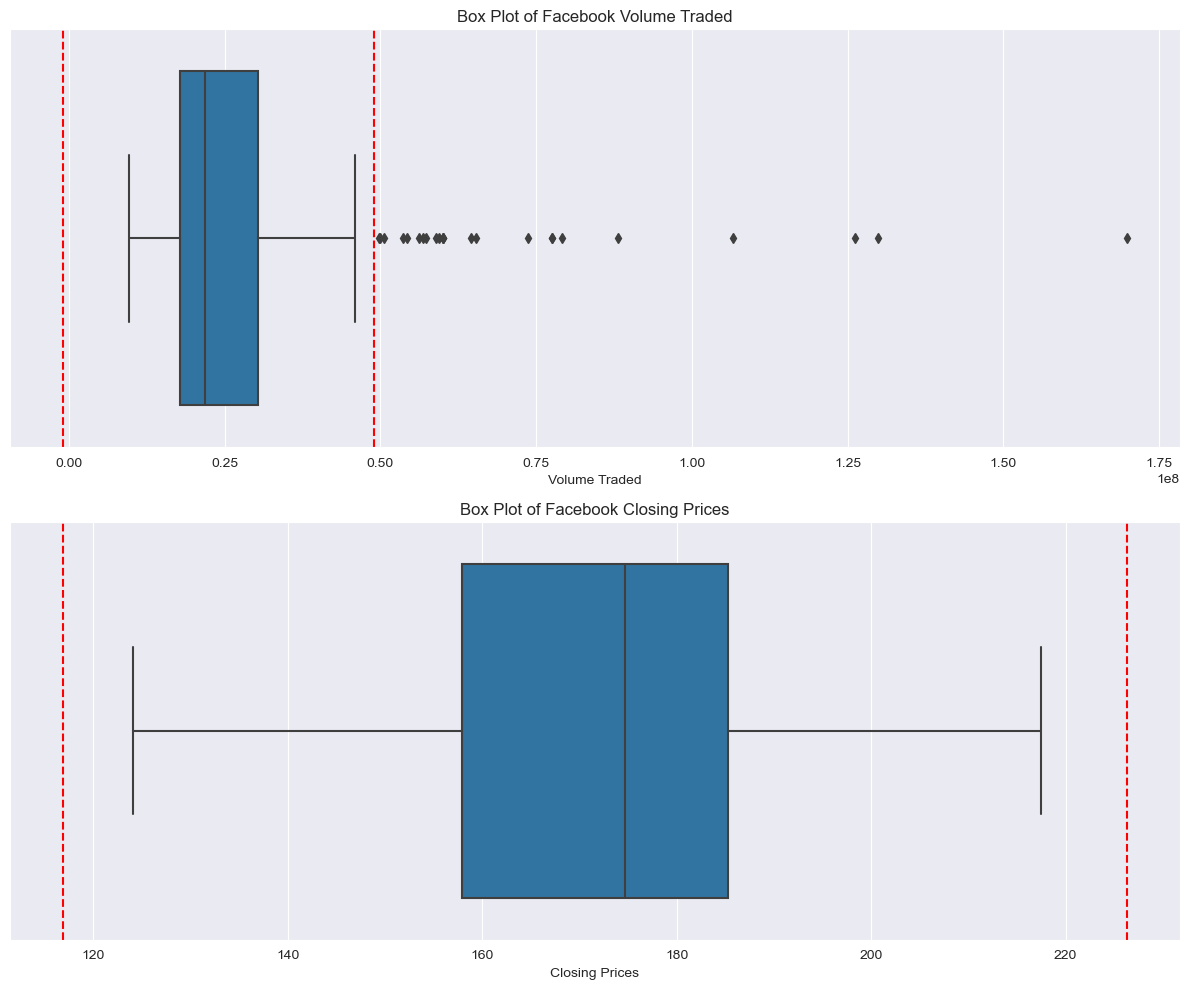

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fb_stock_prices_2018.csv')

# Calculates quantiles and IQR for volume traded
Q1_volume = df['volume'].quantile(0.25)
Q3_volume = df['volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

# Calculates quantiles and IQR for closing prices
Q1_close = df['close'].quantile(0.25)
Q3_close = df['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close
lower_bound_close = Q1_close - 1.5 * IQR_close
upper_bound_close = Q3_close + 1.5 * IQR_close

# Creates subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Creates box plot for volume traded using Seaborn. Sets upper and lower bounds using dotted line.
sns.boxplot(x=df['volume'], ax=ax1)
ax1.axvline(x=lower_bound_volume, color='r', linestyle='--')
ax1.axvline(x=upper_bound_volume, color='r', linestyle='--')
ax1.set_title('Box Plot of Facebook Volume Traded')
ax1.set_xlabel('Volume Traded')

# Creates box plot for closing prices using Seaborn
sns.boxplot(x=df['close'], ax=ax2)
ax2.axvline(x=lower_bound_close, color='r', linestyle='--')
ax2.axvline(x=upper_bound_close, color='r', linestyle='--')
ax2.set_title('Box Plot of Facebook Closing Prices')
ax2.set_xlabel('Closing Prices')

plt.tight_layout()
plt.show()


3. Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed vertical line on the date that it surpassed 1 million. Be sure to format the tick labels on the y-axis accordingly.

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'date'],
      dtype='object')


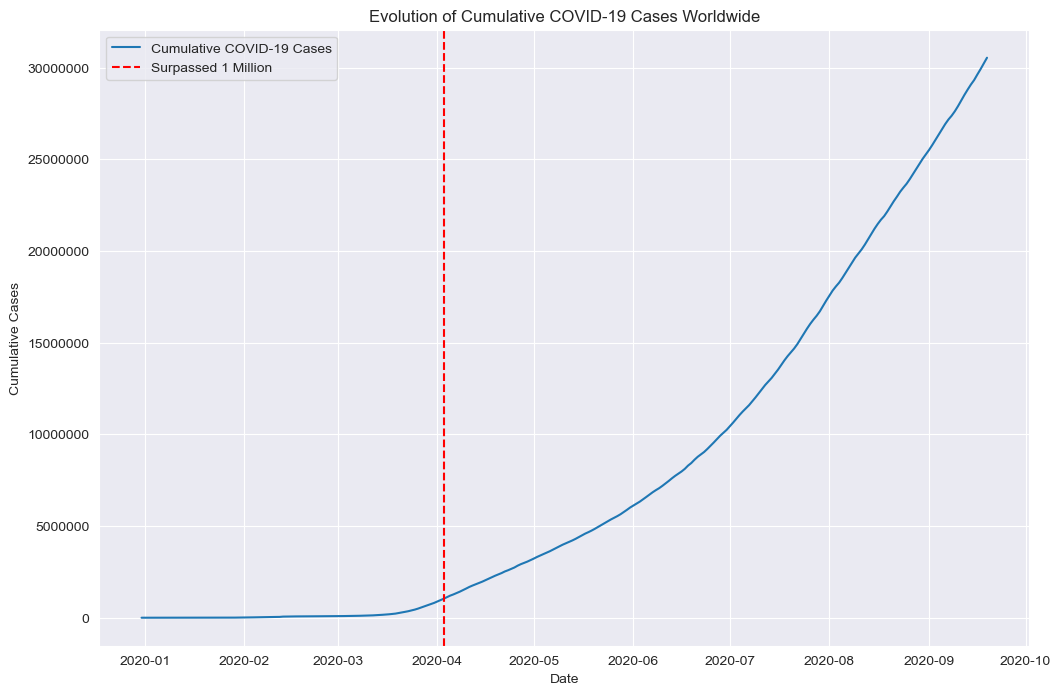

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Loads data and ensures date is parsed correctly
covid = pd.read_csv('covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
)
print(covid.columns)  # Confirms column names for reference.

# Groups by date and sum cases for worldwide cumulative cases
world_df = covid.groupby('date')['cases'].sum().reset_index()
world_df['total_cases'] = world_df['cases'].cumsum()

# Identifies the date when cases surpassed 1 million
mil_mark = world_df[world_df['total_cases'] > 1000000].iloc[0]['date']

# Plots the evolution of cumulative cases and marks where the number of cases surpassed 1 million
plt.figure(figsize=(12, 8))
plt.plot(world_df['date'], world_df['total_cases'], label='Cumulative COVID-19 Cases')
plt.axvline(mil_mark, color='r', linestyle='--', label='Surpassed 1 Million')

# Formats labels, title, legend, and grid.
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Evolution of Cumulative COVID-19 Cases Worldwide')
plt.legend()
plt.grid(True)
plt.show()


4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31',which marks the large decline in Facebook price on a line plot of the closing price.

Text(0, 0.5, 'Price ($)')

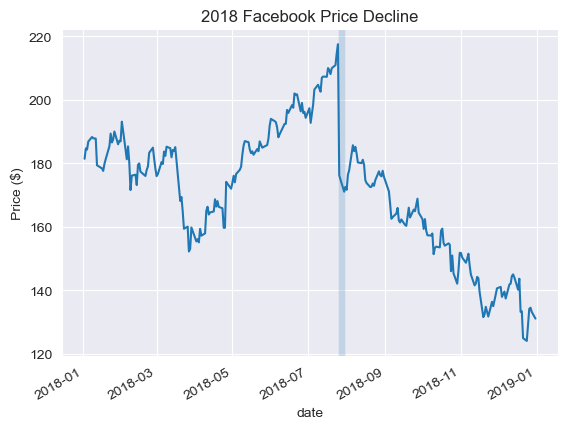

In [4]:
import pandas as pd
from stock_analysis import StockAnalyzer

# Create FB DataFrame, set date format to datetime, and set date as index.
fb = pd.read_csv('fb_stock_prices_2018.csv')
fb['date'] = pd.to_datetime(fb['date']) 
fb.set_index('date', inplace=True)
# Initializes the StockAnalyzer
fb_analyzer = StockAnalyzer(fb)
# Plots the closing price decline, the period to be highlighted, and the label/title.
fb.close['2018'].plot(title='2018 Facebook Price Decline')
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.2)
plt.ylabel('Price ($)')

5. Using the Facebook stock price data, annotate the following three events on a lineplot of the closing price:
a) Disappointing user growth announced after close on July 25, 2018
b) Cambridge Analytica story breaks on March 19, 2018 (when it affected themarket)
c) FTC launches investigation on March 20, 2018

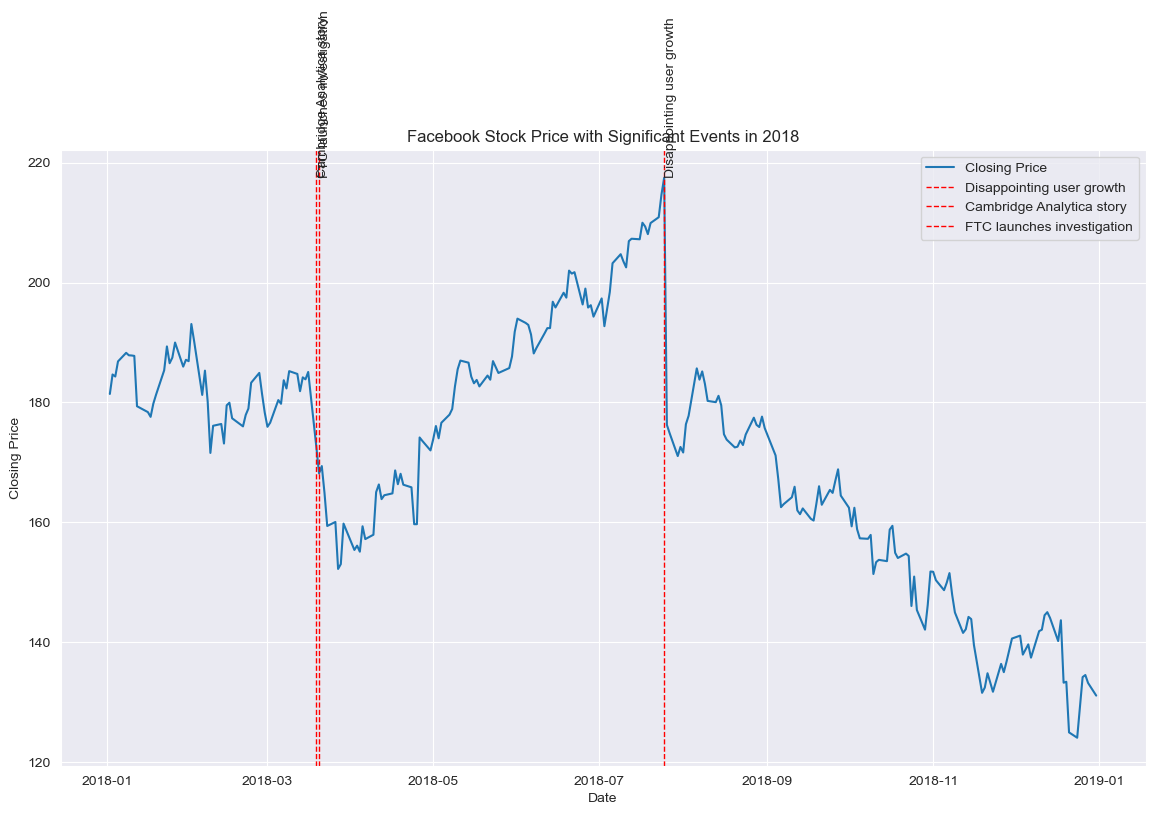

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv')
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)

# Defines the dates of significant events
events = {
    "Disappointing user growth": "2018-07-25",
    "Cambridge Analytica story": "2018-03-19",
    "FTC launches investigation": "2018-03-20"
}

# Plots the closing prices
plt.figure(figsize=(14, 8))
plt.plot(fb.index, fb['close'], label='Closing Price')

# Annotates the significant events
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', lw=1, label=event)
    plt.text(pd.to_datetime(date), fb['close'].max(), event, rotation=90, verticalalignment='bottom')

# Adds labels, title, legend, and grid lines to the chart.
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Stock Price with Significant Events in 2018')
plt.legend()
plt.grid(True)
plt.show()


6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

[<Axes: xlabel='log_volume', ylabel='max_abs_change'>,
 <Axes: xlabel='log_volume', ylabel='residuals'>,
 <Axes: xlabel='max_abs_change', ylabel='log_volume'>,
 <Axes: xlabel='max_abs_change', ylabel='residuals'>]

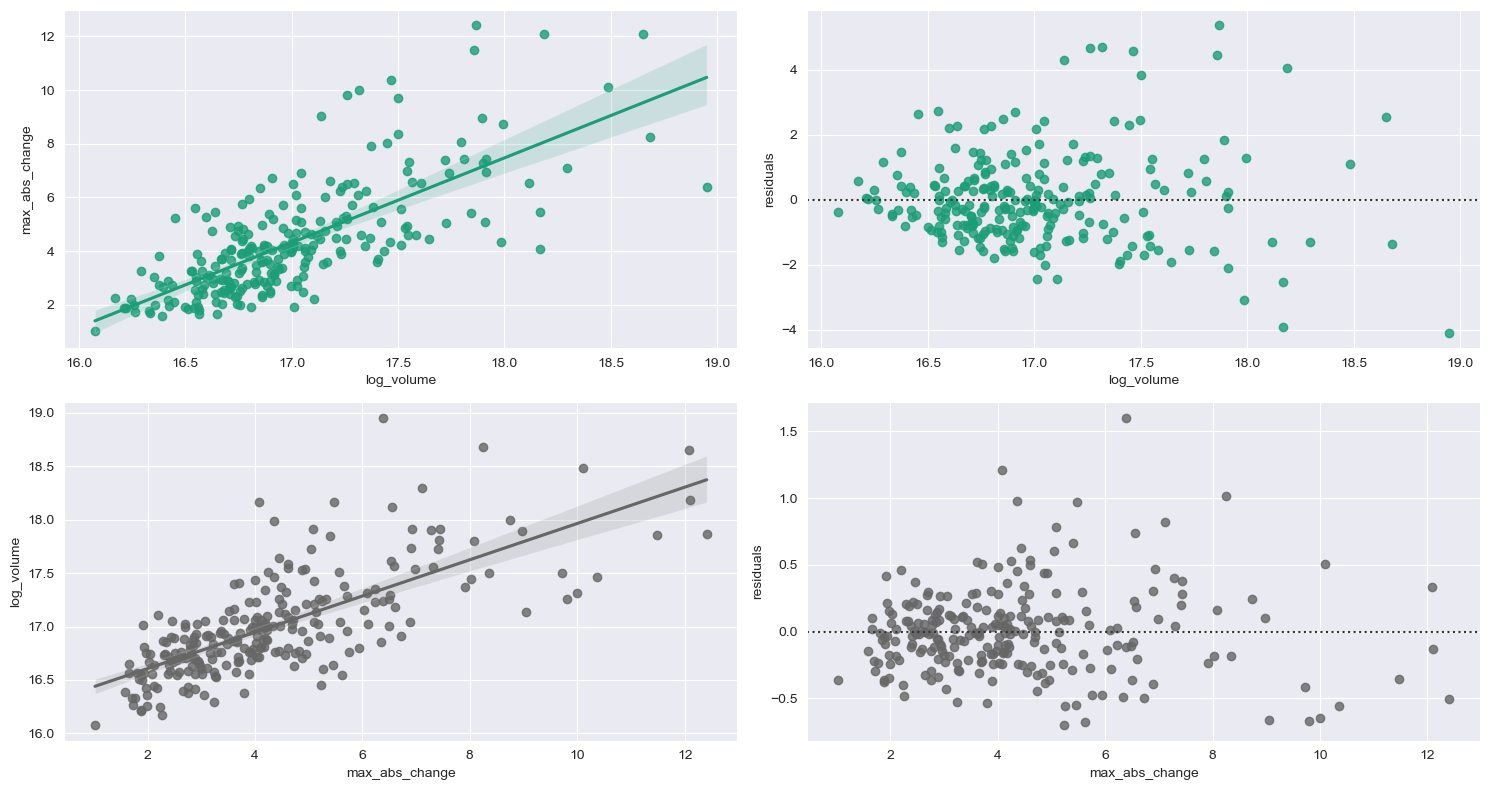

In [16]:
from viz import reg_resid_plots
import pandas as pd
import numpy as np

fb = pd.read_csv('fb_stock_prices_2018.csv')
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)

# Creates a dataframe with two newly created columns.
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:, -2:]

# Call the function and set the colormap.
reg_resid_plots(fb_reg_data, colormap='Dark2')


In [10]:
colormap_names = plt.colormaps()
print(colormap_names)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G